# Part I - (Data Science Job Salaries)
## by Morris Mensah

## Introduction

This dataset contains information about the various data science jobs and their respective salaries based on some factors like experience level, company size,and many more. The dataset can be found at https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries


#### Column	Description

**work_year :**	The year the salary was paid.

**experience_level :**	The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

**employment_type :**	The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
job_title	The role worked in during the year.

**salary :**	The total gross salary amount paid.

**salary_currency :**	The currency of the salary paid as an ISO 4217 currency code.

**salary_in_usd :**	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

**employee_residence :**	Employee's primary country of residence in during the work year as an ISO 3166 country code.

**remote_ratio :**	The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

**company_location :**	The country of the employer's main office or contracting branch as an ISO 3166 country code.

**company_size :**	The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# setting up the file location
import os
os.chdir(r"C:\Users\RICHARD\Desktop\DS\Data Sets")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into pandas dataframe
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.info())
print(df.isnull().sum())

(607, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB
None
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio 

In [4]:
# convert experience_level and company_size into ordered categorical types
ordered_feature_dict = {'experience_level' : ['EN','MI', 'SE', 'EX'],
                    'company_size' : ['S', 'M', 'L']}


for feature in ordered_feature_dict:
    ordered_feature = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordered_feature_dict[feature])
    df[feature] = df[feature].astype(ordered_feature)
    
# convert remote_ratio to categorical dtype
df['remote_ratio'] = df['remote_ratio'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    int64   
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    object  
 3   job_title           607 non-null    object  
 4   salary              607 non-null    int64   
 5   salary_currency     607 non-null    object  
 6   salary_in_usd       607 non-null    int64   
 7   employee_residence  607 non-null    object  
 8   remote_ratio        607 non-null    category
 9   company_location    607 non-null    object  
 10  company_size        607 non-null    category
dtypes: category(3), int64(3), object(5)
memory usage: 40.3+ KB


In [6]:
# descriptive statistics for numeric variables
df.describe()

,work_year,salary,salary_in_usd
count,607.000000,6.070000e+02,607.000000
mean,2021.405272,3.240001e+05,112297.869852
std,0.692133,1.544357e+06,70957.259411
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,7.000000e+04,62726.000000
50%,2022.000000,1.150000e+05,101570.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


### What is the structure of your dataset?

 There are 607 workers in the dataset with 11 features(work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, and company_size). The variables experience_level, and company_size are ordered factor variables with the following levels.
 
(low)--->(high)

experience_level : EN, MI, SE, EX

company_size : S, M, L


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in investigating what features are best for predicting the salary of the workers in the dataset. I will look at the salary in US dollars($US)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I'm very confident that experience_level will have the strongest effect on each worker's salary. That is, the more experience the worker, the higher the salary. I'm also expecting company_size, company_location, and employment_type to have effects on the salary but not as higher as the main effect of work_experience.

## Univariate Exploration



### Let look at the distribution of the main variable of interest: salary($US)

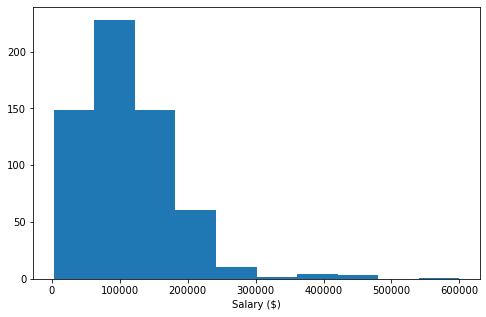

In [7]:
# I will look at the distribution of the salary without any adjustment
plt.figure(figsize = [8, 5])
plt.hist(data = df, x = 'salary_in_usd')
plt.xlabel('Salary ($)')
plt.show()

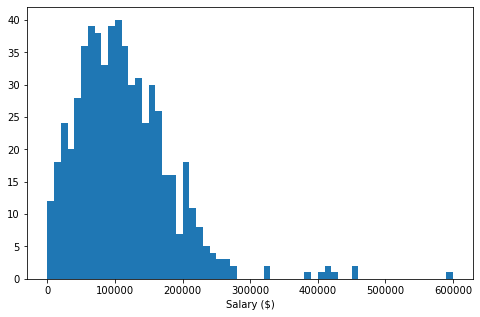

In [8]:
# salary distribution with a standard-saled plot
binsize = 10000
bins = np.arange(0, df['salary_in_usd'].max()+binsize, binsize)

plt.figure(figsize = [8, 5])
plt.hist(data = df, x = 'salary_in_usd', bins = bins)
plt.xlabel('Salary ($)')
plt.show()


It looks like the salary distribution is kind of skewed with most of worker's salary falling below 200,000. Interestingly, few workers receive more than 300,000. This workers could be those with much experience.

### Let have a look at our first predictor of variable of interest: experience_level

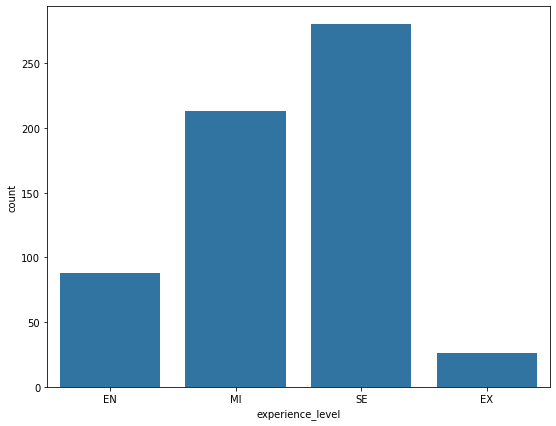

In [9]:
# let's plot the distribution of the workers experience
plt.figure(figsize = [9, 7])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'experience_level', color = default_color)
plt.show()


Based on the distribution, it is clearly seen that most of the workers are senior-level/expert data science professionals. It looks like very few workers fall within the Executive-level/Director. Does it mean companies occaisionally don't hire Executive-level data science professionals?

### How does the distribution of the company size looks like?

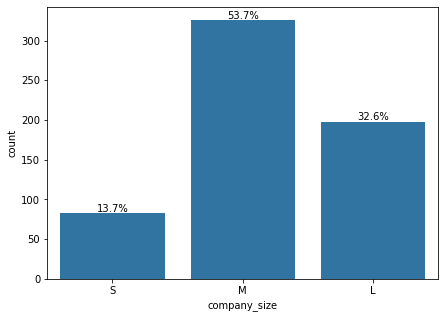

In [10]:
# lets plot the distribution of the comapny_size
plt.figure(figsize = [7, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'company_size', color = default_color)

# Returns the sum of all  values in `company_size` column
n_workers = df['company_size'].value_counts().sum()

company_counts = df['company_size'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation= 0)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = company_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_workers)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')


When I started the exploration I thought majority of the data science professionals would be working in large-size companies. Interestingly, it turns out that majority of the professionals are working in medium size companies representing **`53.7%`** of the workers.

### How does the company_location distribution looks like ?

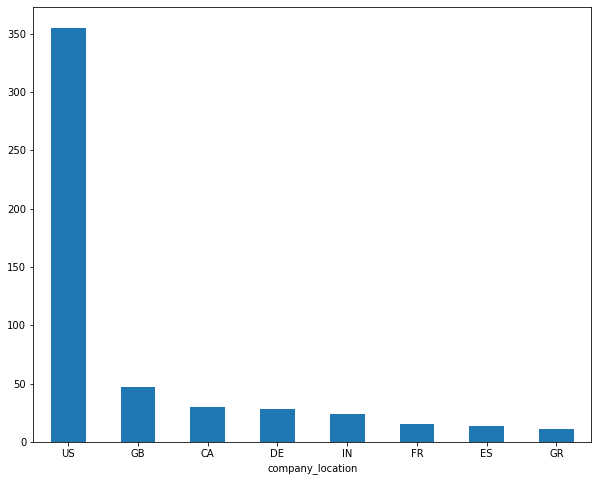

In [11]:
# I will look at the distribution based on some selected countries
value_countries = df.company_location.value_counts()[:8]
value_countries

# plotting
plt.figure(figsize = [10, 8])
value_countries.plot(kind = 'bar')
plt.xlabel('company_location')
plt.xticks(rotation = 0);


Interestingly, most of the data science professionals work for companies located in United State of America(US). What could be the reason? This would be further investigated in the bivariate analysis.

### How is the employment type distributed across dataset?

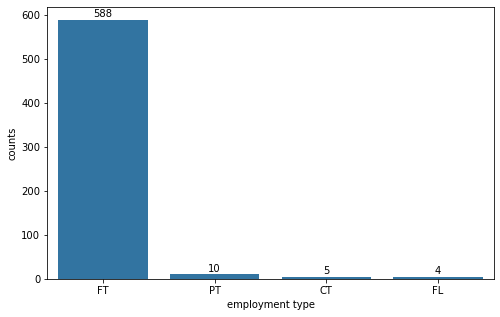

In [12]:
emp_type = df['employment_type'].value_counts()
emp_type_index = emp_type.index.values
plt.figure(figsize = [8, 5])
sb.barplot(emp_type_index, emp_type, color = sb.color_palette()[0])

# get the current tick locations and labels
plt.xticks(rotation = 0)
plt.ylabel('counts')
plt.xlabel('employment type')
# print value on each bar
for i in range(emp_type.shape[0]):
    count = emp_type[i]
    plt.text(i, count+25, count, ha = 'center', va ='top')
    


The graph reveals that most of the data science professionals in the dataset are in a full-time employment. Only 10 professionals are part-time workers.

Before ending the session, I will take a look at the distribution of the `remote_ratio`. Though it's not part of my variables of interest, let see if it holds some interesting features

In [13]:
df.remote_ratio.value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

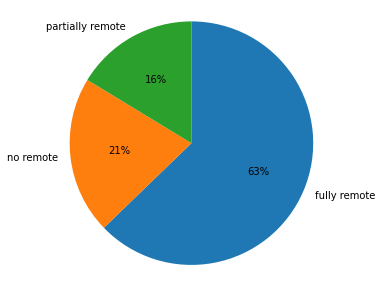

In [14]:
sorted_counts = df.remote_ratio.value_counts()
my_labels = ['fully remote', 'no remote', 'partially remote']
plt.figure(figsize = [8,5])
plt.pie(sorted_counts, labels = my_labels, startangle = 90, counterclock = False, autopct = '%1.f%%')
plt.axis('square');




It clearly seen that greater proportion of the workers fully work from home accounting for **63%** of the total workers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The number of bins in my initial plot was small so I adjusted the bins to see the distribution clearly.After the adjustment, the distribution of the salary variable was a bit skewed to the left with most salaries falling below 200000 dollars. Looks like there was some outliers. However I chose not to clean because those salaries are not mistakenly entered. They represent actual salaries of senior-level and executive data science professionals.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the company_location variable, majority of the professionals were working for companies based in USA. This is an interesting area I would like to explore more in the coming sessions. The dataset was clean so I did not need to perform any adjustment. The only adjustment I did was to change the datatype of some of the variables.

## Bivariate Exploration

#### To start off with, I want to look at the relationship between the `salary_in_usd`, the `experience_level`,  the `company_size` and the `employment_type`

<Figure size 1224x864 with 0 Axes>

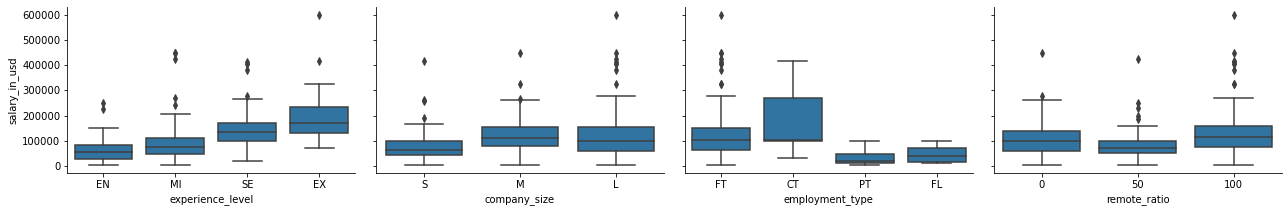

In [15]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid"""
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = default_color)   

plt.figure(figsize = [17,12])    
g = sb.PairGrid(data = df, y_vars = 'salary_in_usd', x_vars = ['experience_level','company_size',
                                                             'employment_type','remote_ratio'], height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show()


It tends out that there is a positive relationship between the experience_level and the salary_in_usd. As the data science professional get more amd more experience the average, minimum and maximum salary also increases. Interestingly, it seems like the minimum salary for Intermediate and Entry-level professionals are the same. Surprisingly, the average salary with regards the medium company size is relatively greater than that of the large company size. However, there is stil positive relationship between the company size and the salary. The employment type does not hold any relationship with the salary. The only interesting feature they hold is the fact that the average salary for a full-time and a contract-type worker is the same. Lastly, the remote ratio does not hold any relationship with salary_in_usd.


#### Is there any relationship between `salary_in_usd` and the `employment_type`?

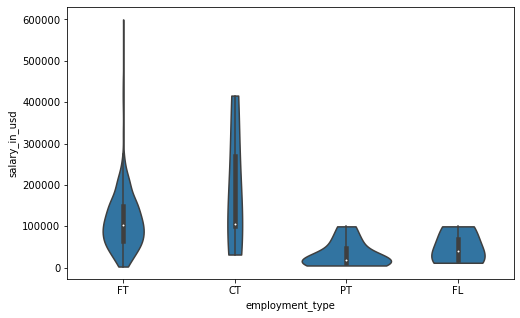

In [16]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
# plotting
sb.violinplot(data = df, x='employment_type', y='salary_in_usd', color=base_color, cut = 0 )
plt.xticks(rotation=0);



Initially, I was expecting some kind of relationship between these two variables. However, there doesn't seem to be any interaction between salary and and employment type. We can see that majority of data science professionals employed on a full-time basis receive salaries a little bit below $300000. Averagely, full-time and contract-type workers receive similar salary. I will not explore these variables further since they do not have any interaction.

In [17]:
df.company_location.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

#### What interaction exists between `salary_in_usd` and `company_location`

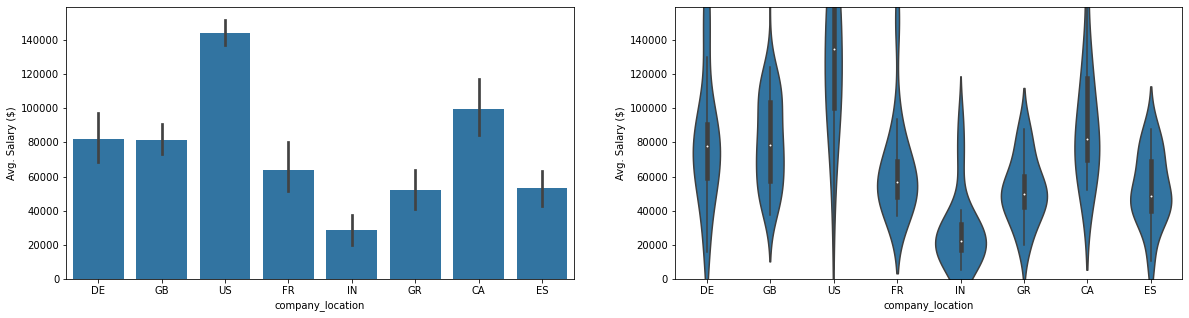

In [18]:
# I will select some few company locations to avoid over-plotting
loc = ['US', 'GB', 'CA', 'DE', 'IN', 'FR', 'ES', 'GR']
sub_loc = df[df['company_location'].isin(loc)]

plt.figure(figsize = [20,5])
base_color = sb.color_palette()[0]
# left plot: barplot
plt.subplot(1, 2, 1)
ax1 = sb.barplot(data = sub_loc, x = 'company_location', y = 'salary_in_usd', color = base_color)
plt.xticks(rotation = 0)
plt.ylabel('Avg. Salary ($)');

# right plot: violin plot
plt.subplot(1, 2, 2)
sb.violinplot(data = sub_loc, x= 'company_location', y ='salary_in_usd',
         color = base_color)
plt.xticks(rotation = 0)
plt.ylabel('Avg. Salary ($)')
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot


There seems to be a positive relationship between the company location and the average salary. It turns out that the professionals prefer to work in a company where the average salary is higher. The higher the average salary of the company location, the more workers like to work in that location.

#### Do `remote_ratio` has some interesting interaction with the` company_location`?

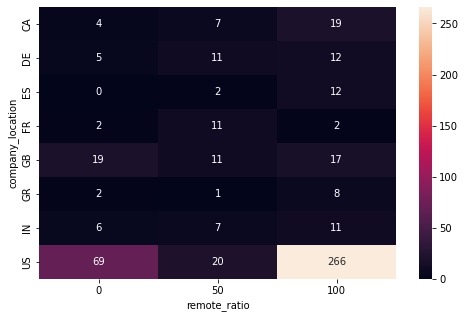

In [19]:
# I will still use some selected company location to see patterns clearly
group = sub_loc.groupby(['company_location', 'remote_ratio']).size().reset_index(name = 'count')
group = group.pivot(index = 'company_location', columns = 'remote_ratio', values = 'count')
group
# plotting
plt.figure(figsize = [8, 5])
sb.heatmap(group, annot = True, fmt = 'd');


The plot shows that fully remote work also account for the reason data science professionals prefer to work in USA. It turns out that companies located in USA gives opportunity for employers to work fully remote based on the dataset.

#### What relationship exists between `company_size` and `employment_type`?

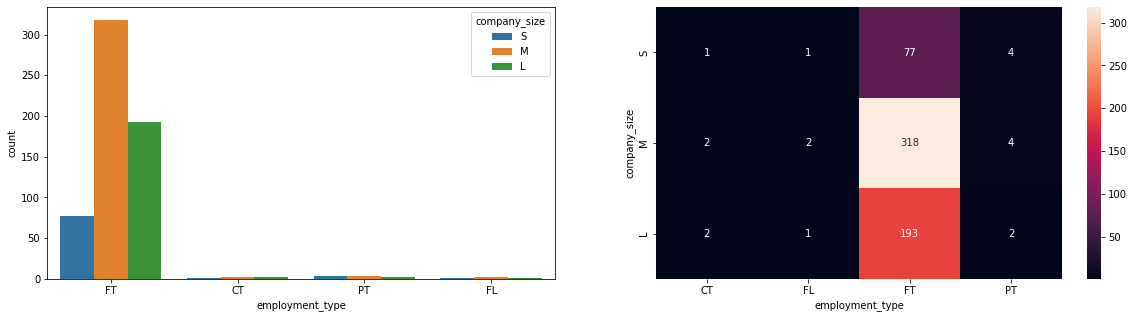

In [20]:
plt.figure(figsize = [20, 5])
# left plot:count plot
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'employment_type', hue = 'company_size');
plt.xticks(rotation = 0);

# right plot:heatmap
plt.subplot(1, 2, 2)
group_by = df.groupby(['employment_type', 'company_size']).size().reset_index(name='count') 
group_by = group_by.pivot(index = 'company_size', columns = 'employment_type', values = 'count')
sb.heatmap(group_by, annot = True, fmt = 'd');


I was expecting company size to move in the same direction with the employment type but surprisignly it was not so. If we concentrate on the full-time employment type it can been seen that medium size companies turn to hire more full-time data science professionals based on the datasets. I was expecting large size companies to hire more people on a full-time basis. Based on the plots, no relationship exists between company size and employment type.

Finally, let's look at relationships between the three categorical features.

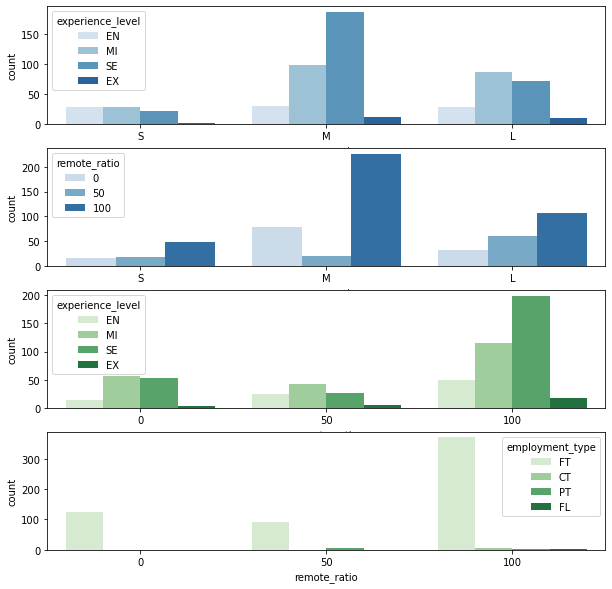

In [21]:
plt.figure(figsize = [10, 10])

# subplot 1: experience_level vs company_size
plt.subplot(4, 1, 1)
sb.countplot(data = df, x = 'company_size', hue = 'experience_level', palette = 'Blues')

# subplot : remote_ratio vs company_size
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df, x = 'company_size', hue = 'remote_ratio', palette = 'Blues')

# subplot 3: remote_ratio vs experience_level
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df, x = 'remote_ratio', hue = 'experience_level', palette = 'Greens')

# subplot 4: employment_tye vs. remote_ratio
ax = plt.subplot(4, 1, 4)
sb.countplot(data = df, x = 'remote_ratio', hue = 'employment_type', palette = 'Greens')
plt.show()


From the plots, we can see that there is no interaction between the company size and the experience level. It looks like there are more middle-level(MI) and senior-level(SE) data science professionals in company size M and L. With regards to the remote ratio, there seems like there are more data science professionals who are fully-remote workers(100) across all company size(S, M, L). We can also see that MI and SE professionals are prevalent in all remote ratio(0, 50, 100) with more MI and SE professionals working fully-remote(100). There is no relationship existing between the remote ratio and the employmen type except that there is a lot of full-time professionals working remotely.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Salary_in_usd had linear relationship with experience_level when plotted on the box plot. It was so clear that as the professional get more experience, the salary also increases. Company_size also showed some interaction(linear one) with salary_in_usd. When we take the maximum of the box plot, we realised that the maximum salary increases as the company size becomes bigger. The company location also had some interaction with the salary of data science professionals. Stroger economies like the USA tends to pay higher salaries and the lower economies pay relatively lower salaries.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The employment type and the remote ratio show no relationship and did not have any correlation or effect on salary_in_usd. These variables would not be further investigated in the next session of the analysis.

## Multivariate Exploration



In this session, I want to explore how the company size, company location, and the experience level affect the salary of the data science professionals.

#### What relationship exists between the `experience_level`, `company_size`, and `salary_in_usd`?

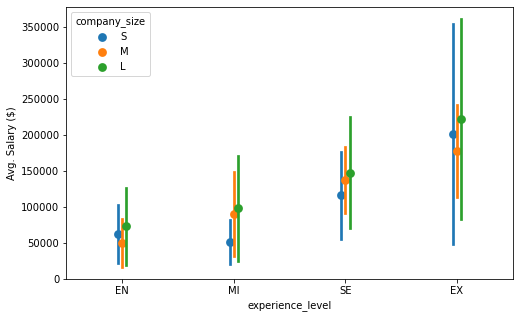

In [22]:
# Adding company_size as the third variable
plt.figure(figsize = [8, 5])
sb.pointplot(data = df, x = 'experience_level', y = 'salary_in_usd', hue = 'company_size', ci = 'sd',
             linestyles = "", dodge = True);
plt.xticks(rotation = 0)
plt.ylabel('Avg. Salary ($)');


Interestingly, there is some interaction of company size on the average salary across all levels of experience especially for large-size companies(L). The plot shows that the average salary for large-size(L) company is higher across all levels of experience. The average salary for small_size(S) companies is at it peak at the EX experience level which is almost closer to that of the large_company_size(L)

#### Does the `company_location`, `company_size`, and `salary_in_usd` hold any interaction?

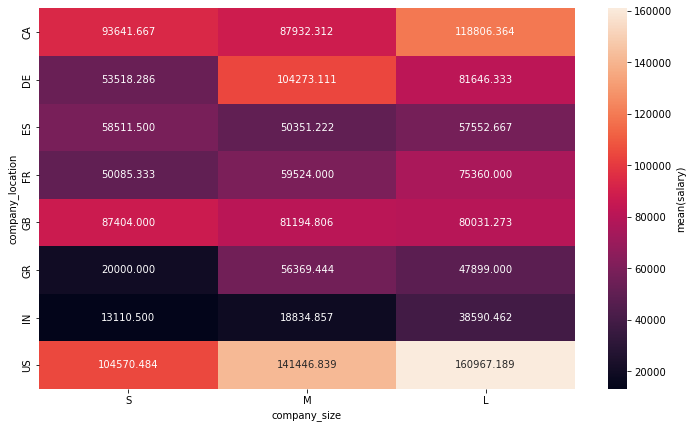

In [23]:
plt.figure(figsize = [12,7])
# I will use the sub_loc I previously created to avoid overplotting
mean_salary = sub_loc.groupby(['company_location', 'company_size']).mean()['salary_in_usd']
mean_salary  = mean_salary.reset_index(name = 'avg_salary')
mean_salary  = mean_salary.pivot(index = 'company_location', columns = 'company_size',
                            values = 'avg_salary')
sb.heatmap(mean_salary , annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(salary)'})
plt.show()


It is clear from the plot that the company location has influence on the mean salary of data science professionals across the different company size. If we take a stronger economy like USA, we see that the mean salary across all company size(S, M, L) is better than other countries which is cleary seen when you compare it to India(IN). Canada(CA) also showed much better position with regards to the mean salary in all company size. 

#### What relationship exists between the `experience_level`, `company_locatiion`, and `salary_in_usd`?

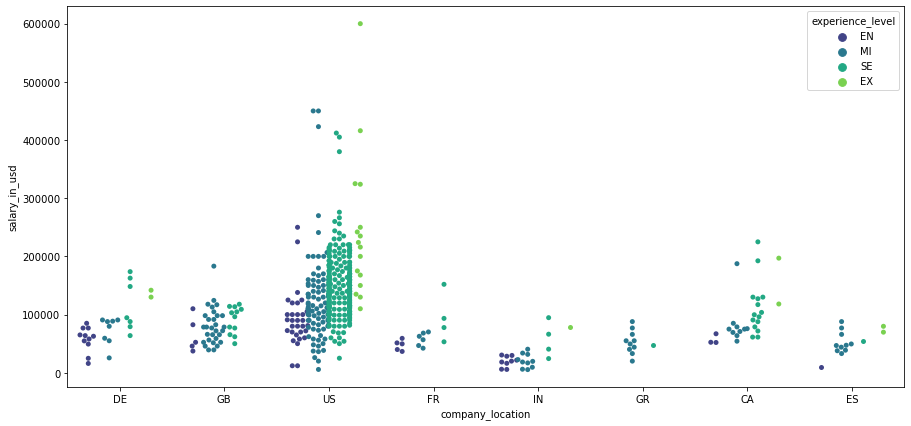

In [24]:
plt.figure(figsize=(15,7))
sb.swarmplot(x='company_location', y='salary_in_usd', data=sub_loc, hue='experience_level', dodge=True, palette='viridis')
plt.show()

In this plot we can easily see where the dense salary group are in different company location across the levels of experience. If we take USA for instance, the salary is much more concentrated little below 300000 with the senior experience level(SE) having much of the concentration and also few people earning above 300000. For the rest of the company location, the salary is approximately below 250000 across all levels of experience.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I decided to dive deeper into how experience level, company location, and company size play a role in the determination of the salaries of data science professionals and it was clear that they had influence on salary. Large size comapnies(L) and medium-size copanies(M) for instance showed direct relationship with average salary on all experience levels. I also discovered that higher mean salary were prevalent in locations like USA(US) and Canada(CA) for all experience level. This indicated that stronger the company location, the higher the salary.

### Were there any interesting or surprising interactions between features?

It was strange to see that the average salary for entry-level data science professionals in small(S) comapany size was higer than that of the medium(M) size companies.

## Conclusions

In the exploration, I found that the salary distribution was skewed to the left with majority of salaries concentrated/densed below $200000. It was evident in the exploration that strong relationship existed between the `salary_in_usd` and the `experience_level` when plotted with box plot. The relationship was also clear in the multivariate exploration session when I wanted to discover the interaction between the `expeerience_level`, `company_size`, and `salary_in_usd`. It was clear that the average `salary_in_usd` across different company sizes(S, M, L) when one get more experienced. 
When I sub-selected some company location and plotted against `salary_in_usd`, it was seen that stronger economies tend to pay high salary with USA(US) and Canada(CA) being the spotlight.

Other variables like `employment_type` and `remote_ratio` did not hold any relationship and had no influece on salary so decided not to further investigate these features.